### TELECOM CHURN PREDICTION

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [158]:
from sklearn.feature_selection import chi2

### Problem statement 

### Data gathering

In [159]:
df = pd.read_csv("usec_Telco_Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [161]:
# Convert 'TotalCharges' column to numeric (float) datatype

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)


float64


In [162]:
null_values = df.isnull().sum()
print(null_values, '\n')
columns_with_null = null_values[null_values > 0]
print(columns_with_null)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64 

TotalCharges    11
dtype: int64


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [164]:
conversion_errors = df['TotalCharges'][df['TotalCharges'].isnull()]
print("Conversion Errors:", conversion_errors)

# Drop rows with conversion errors (if any)
df.dropna(subset=['TotalCharges'], inplace=True)

# Now, the 'TotalCharges' column should be of numeric datatype
print(df['TotalCharges'].dtype)

Conversion Errors: 488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64
float64


In [165]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [166]:
df_cols = df.columns
df_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [167]:
for col in df_cols:
    display(df[col].value_counts())

customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64

gender
Male      3549
Female    3483
Name: count, dtype: int64

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [168]:
df.drop('customerID', axis=1, inplace = True)

In [169]:
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: x.replace('(', '').replace(')', ''))
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check           2365
Mailed check               1604
Bank transfer automatic    1542
Credit card automatic      1521
Name: count, dtype: int64

In [170]:
categorical_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]

numerical_col =['MonthlyCharges', 'TotalCharges']

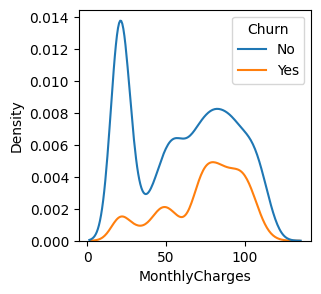

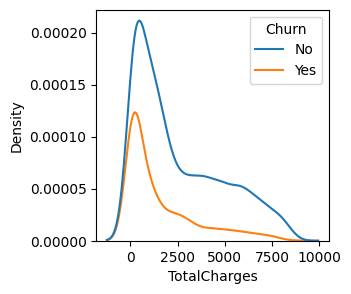

In [171]:
for column in numerical_col:
    plt.figure(figsize=(3,3))
    sns.kdeplot(data = df, x = df[column], hue ='Churn')
    plt.show()

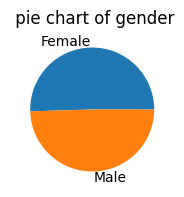

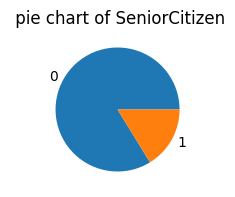

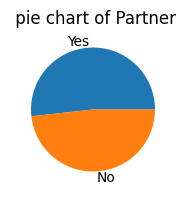

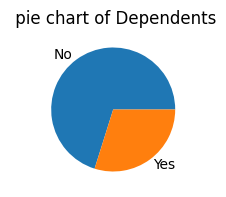

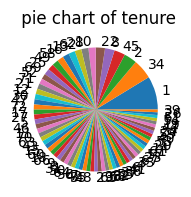

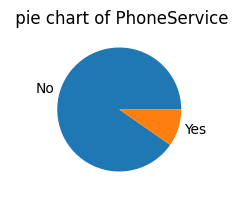

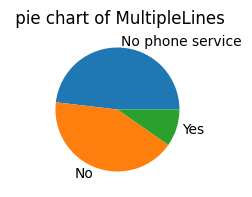

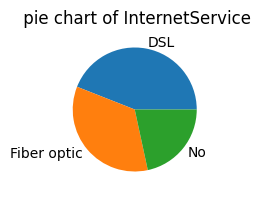

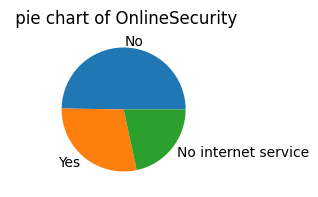

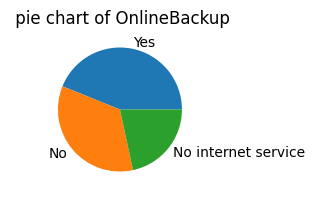

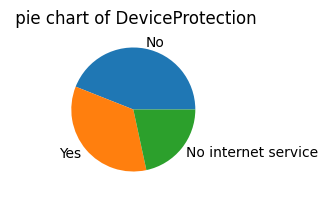

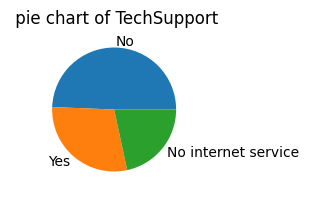

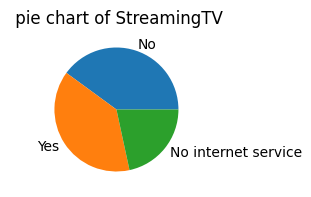

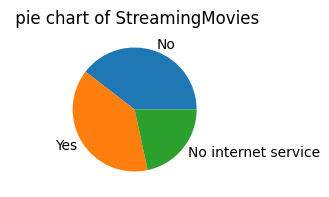

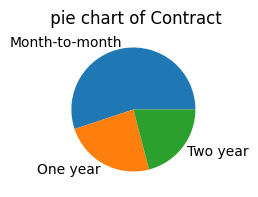

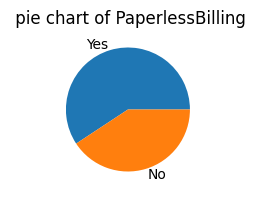

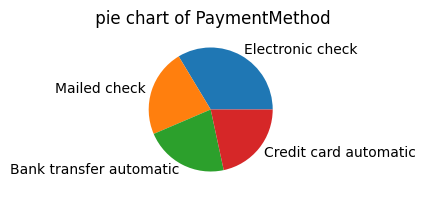

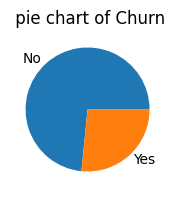

In [172]:
for column in categorical_col:
    plt.figure(figsize=(2,4))
    plt.pie(df[column].value_counts(), labels = df[column].unique().tolist())
    plt.title(f' pie chart of {column}')
    plt.show()

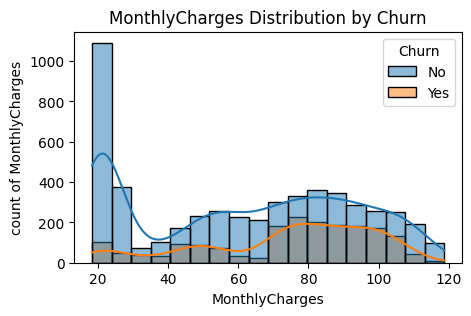

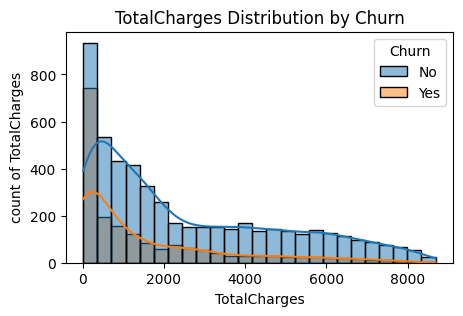

In [173]:
for column in numerical_col:
    plt.figure(figsize=(5,3))
    sns.histplot(df, x = column, hue='Churn', kde = True)
    plt.xlabel(column)
    plt.ylabel(f'count of {column}')
    plt.title(f'{column} Distribution by Churn')
    plt.show()  

<Figure size 500x500 with 0 Axes>

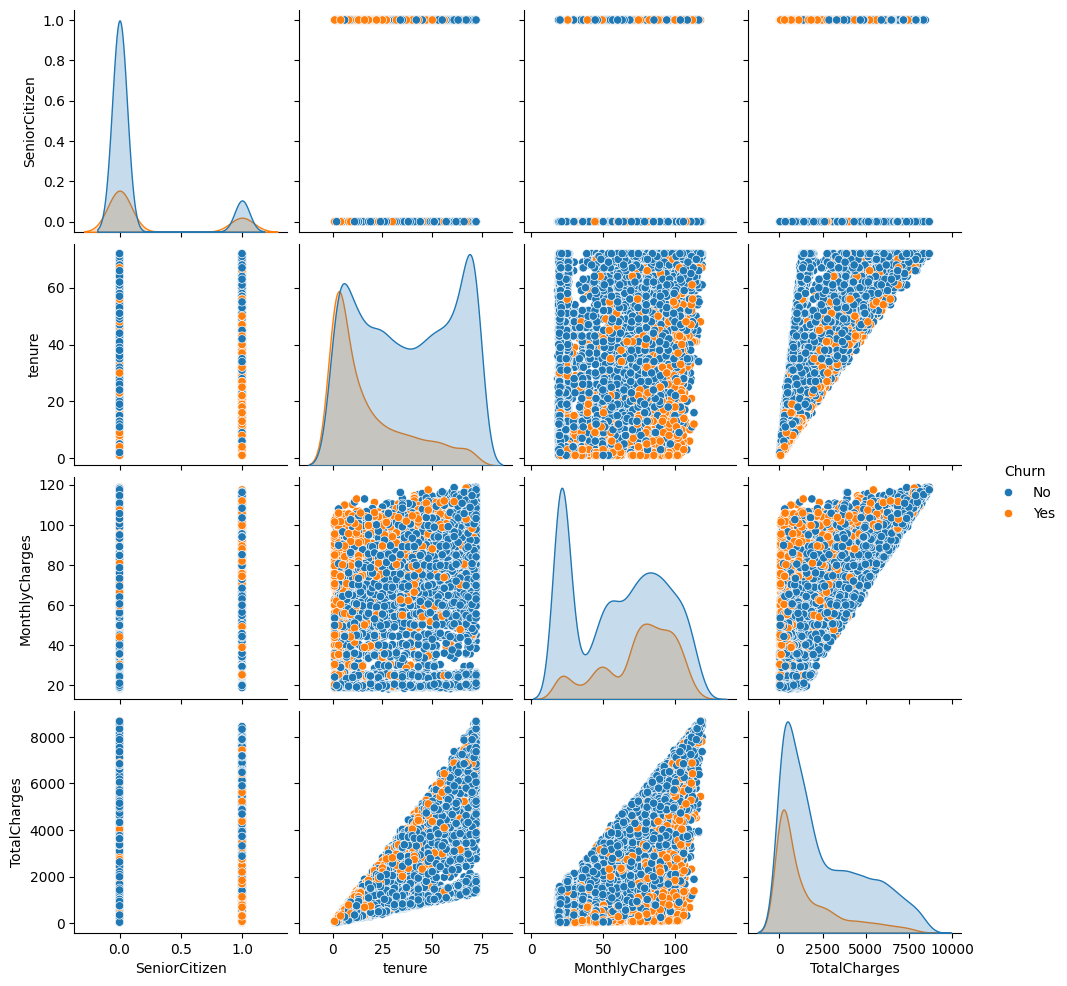

In [174]:
plt.figure(figsize=(5,5))
sns.pairplot(df, hue='Churn')
plt.show()

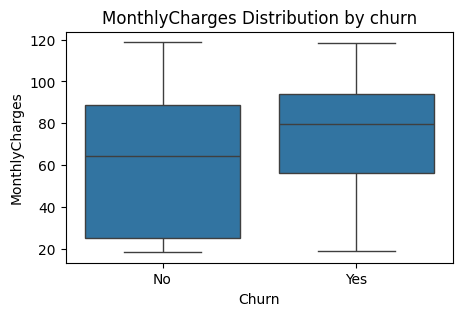

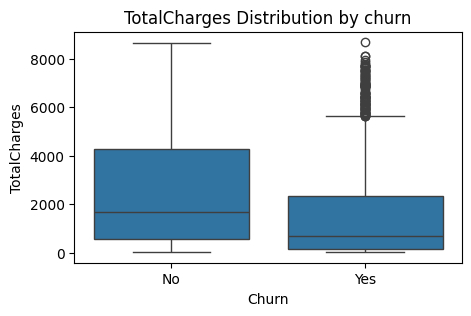

In [175]:
for column in numerical_col:
    plt.figure(figsize=(5,3))
    sns.boxplot(df, x='Churn', y=column,)
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.title(f'{column} Distribution by churn')
    plt.show()

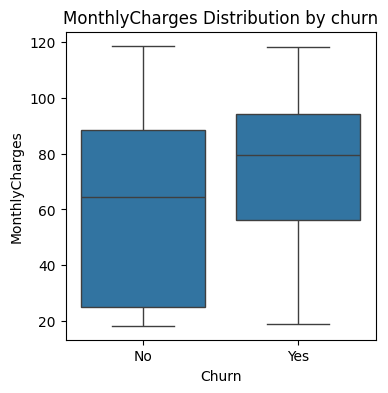

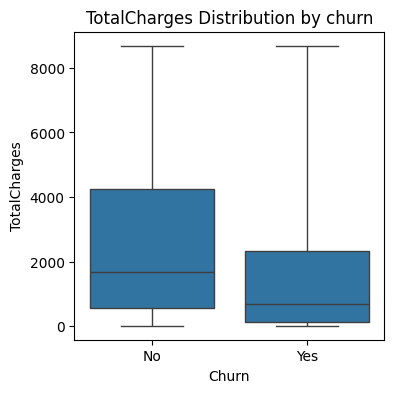

In [179]:
for column in numerical_col:
    plt.figure(figsize=(4,4))
    sns.boxplot(df, x='Churn', y=column, whis= 3)
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.title(f'{column} Distribution by churn')
    plt.show()

<Axes: >

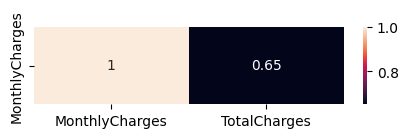

In [138]:
correlation = df[numerical_col].corr().head(1)
plt.figure(figsize=(5,1))
sns.heatmap(correlation, annot= True )

In [139]:
pd.crosstab(index=df['Churn'], columns=df['tenure']).T.head(36)

Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
6,70,40
7,80,51
8,81,42
9,73,46


In [140]:
pd.crosstab(index=df['Churn'], columns=df['tenure']).T.tail(36)

Churn,No,Yes
tenure,,
37,50,15
38,46,13
39,42,14
40,51,13
41,56,14
42,51,14
43,50,15
44,45,6
45,55,6


In [141]:
obj_df = df.select_dtypes(include= object ).head()
nominal_cols = list(obj_df.columns)

In [142]:
enc_df = pd.get_dummies(df, columns= nominal_cols, drop_first=True, dtype=int)
lst = list(enc_df.columns)
lst

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card automatic',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn_Yes']

In [143]:
clean_list = [item.replace(' ', '_') for item in lst]
clean_list

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No_phone_service',
 'MultipleLines_Yes',
 'InternetService_Fiber_optic',
 'InternetService_No',
 'OnlineSecurity_No_internet_service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No_internet_service',
 'OnlineBackup_Yes',
 'DeviceProtection_No_internet_service',
 'DeviceProtection_Yes',
 'TechSupport_No_internet_service',
 'TechSupport_Yes',
 'StreamingTV_No_internet_service',
 'StreamingTV_Yes',
 'StreamingMovies_No_internet_service',
 'StreamingMovies_Yes',
 'Contract_One_year',
 'Contract_Two_year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit_card_automatic',
 'PaymentMethod_Electronic_check',
 'PaymentMethod_Mailed_check',
 'Churn_Yes']

In [144]:
enc_df.columns = clean_list
enc_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [148]:
enc_df['Churn'] = enc_df['Churn_Yes'] 

In [152]:
ind_cate_col = enc_df[['SeniorCitizen',
 'tenure',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No_phone_service',
 'MultipleLines_Yes',
 'InternetService_Fiber_optic',
 'InternetService_No',
 'OnlineSecurity_No_internet_service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No_internet_service',
 'OnlineBackup_Yes',
 'DeviceProtection_No_internet_service',
 'DeviceProtection_Yes',
 'TechSupport_No_internet_service',
 'TechSupport_Yes',
 'StreamingTV_No_internet_service',
 'StreamingTV_Yes',
 'StreamingMovies_No_internet_service',
 'StreamingMovies_Yes',
 'Contract_One_year',
 'Contract_Two_year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit_card_automatic',
 'PaymentMethod_Electronic_check',
 'PaymentMethod_Mailed_check']]

dep_cate_col = enc_df['Churn']
chi2_val, p_val = chi2(ind_cate_col, dep_cate_col)
chi2_df = pd.DataFrame({"Chi2_values" : np.around(chi2_val,4),
                        'P-Value': np.around(p_val,4)}, index = ind_cate_col.columns)
chi2_df

,Chi2_values,P-Value
SeniorCitizen,133.4828,0.0000
tenure,16377.3281,0.0000
gender_Male,0.2543,0.6141
Partner_Yes,81.8578,0.0000
Dependents_Yes,131.2715,0.0000
PhoneService_Yes,0.0929,0.7605
MultipleLines_No_phone_service,0.8682,0.3514
MultipleLines_Yes,6.5147,0.0107
InternetService_Fiber_optic,372.0829,0.0000
InternetService_No,285.4752,0.0000
